# Hadamard and Measure

In [2]:
from qiskit import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
backend = BasicAer.get_backend('dm_simulator')
# Noise parameters
options = {}
options_noisy = {
    "thermal_factor": 0.,
    "decoherence_factor": .9,
    "depolarization_factor": 0.99,
    "bell_depolarization_factor": 0.99,
    "decay_factor": 0.99,
    "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
    "tsp_model_error": [1., 0.],
    "plot": False
    }

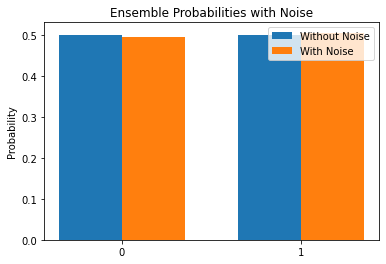

In [6]:
h1_qc = QuantumCircuit(1,1)
h1_qc.h(0)
h1_qc.measure(0,0,basis='Ensemble', add_param='Z')

run = execute(h1_qc,backend,**options)
result = run.result()
run_error = execute(h1_qc,backend,**options_noisy)
result_error = run_error.result()
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob_error = result_error['results'][0]['data']['ensemble_probability']

labels = prob.keys()
without_noise = prob.values()
with_noise = prob_error.values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Ensemble Probabilities with Noise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

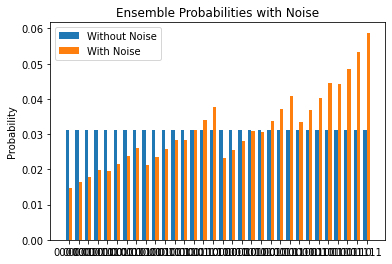

In [7]:
h1_qc = QuantumCircuit(5,1)
h1_qc.h(range(5))
h1_qc.measure(0,0,basis='Ensemble', add_param='Z')

run = execute(h1_qc,backend,**options)
result = run.result()
run_error = execute(h1_qc,backend,**options_noisy)
result_error = run_error.result()
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob_error = result_error['results'][0]['data']['ensemble_probability']

labels = prob.keys()
without_noise = prob.values()
with_noise = prob_error.values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Ensemble Probabilities with Noise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()